<a href="https://colab.research.google.com/github/OmairHamdalla/Music_EDA/blob/main/Music_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!kaggle datasets download -d joebeachcapital/30000-spotify-songs
!unzip -o 30000-spotify-songs.zip

Dataset URL: https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs
License(s): DbCL-1.0
 66% 2.00M/3.01M [00:00<00:00, 2.51MB/s]
100% 3.01M/3.01M [00:01<00:00, 3.06MB/s]
Archive:  30000-spotify-songs.zip
  inflating: readme.md               
  inflating: spotify_songs.csv       


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
df = pd.read_csv('/content/spotify_songs.csv')

df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [5]:
print("Missing values per column:\n", df.isnull().sum())

# Convert date to datetime
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')


def preprocess_df(df):
    # Replace empty strings with NaN (so they are treated as missing)
    df = df.replace(r'^\s*$', np.nan, regex=True)

    # Replace None with NaN explicitly
    df = df.replace({None: np.nan})

    # Remove rows with any NaN values
    df = df.dropna()

    # Remove duplicate rows
    df = df.drop_duplicates()

    # Reset index after cleaning
    df = df.reset_index(drop=True)

    return df

df = preprocess_df(df)

Missing values per column:
 track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


In [6]:
df.describe()

,track_popularity,track_album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,30942.000000,30942,30942.00000,30942.000000,30942.000000,30942.000000,30942.000000,30942.000000,30942.000000,30942.000000,30942.000000,30942.000000,30942.000000,30942.000000
mean,42.756092,2012-09-09 02:04:26.666666752,0.65726,0.698857,5.368011,-6.639354,0.560953,0.108230,0.175963,0.086956,0.189978,0.505024,120.942303,223946.640973
min,0.000000,1957-01-01 00:00:00,0.00000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,25.000000,2010-12-03 06:00:00,0.56600,0.582000,2.000000,-8.073000,0.000000,0.041500,0.015200,0.000000,0.093100,0.326000,99.975000,186750.000000
50%,45.000000,2017-01-27 00:00:00,0.67400,0.721000,6.000000,-6.093000,1.000000,0.063600,0.081000,0.000015,0.127000,0.506000,122.001000,214400.000000
75%,62.000000,2019-05-16 00:00:00,0.76200,0.840000,9.000000,-4.605000,1.000000,0.134000,0.256000,0.005060,0.247000,0.687000,133.519000,251099.750000
max,100.000000,2020-01-29 00:00:00,0.98300,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000
std,24.951656,NaN,0.14393,0.180722,3.613992,2.949117,0.496279,0.101773,0.220050,0.227409,0.153933,0.232749,26.849662,59116.339335


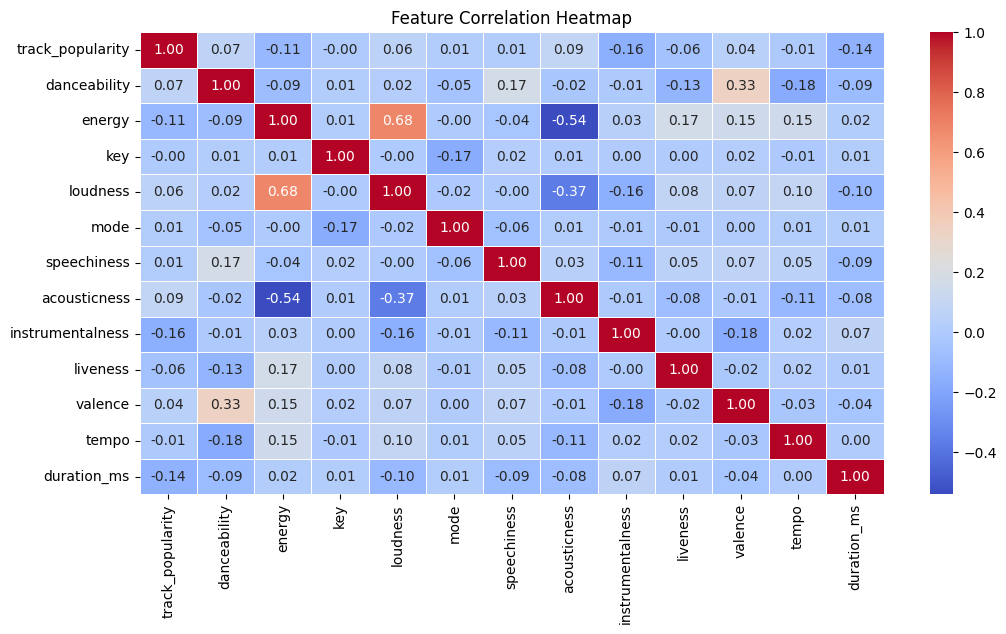

In [7]:
numeric_df = df.select_dtypes(include=['number'])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

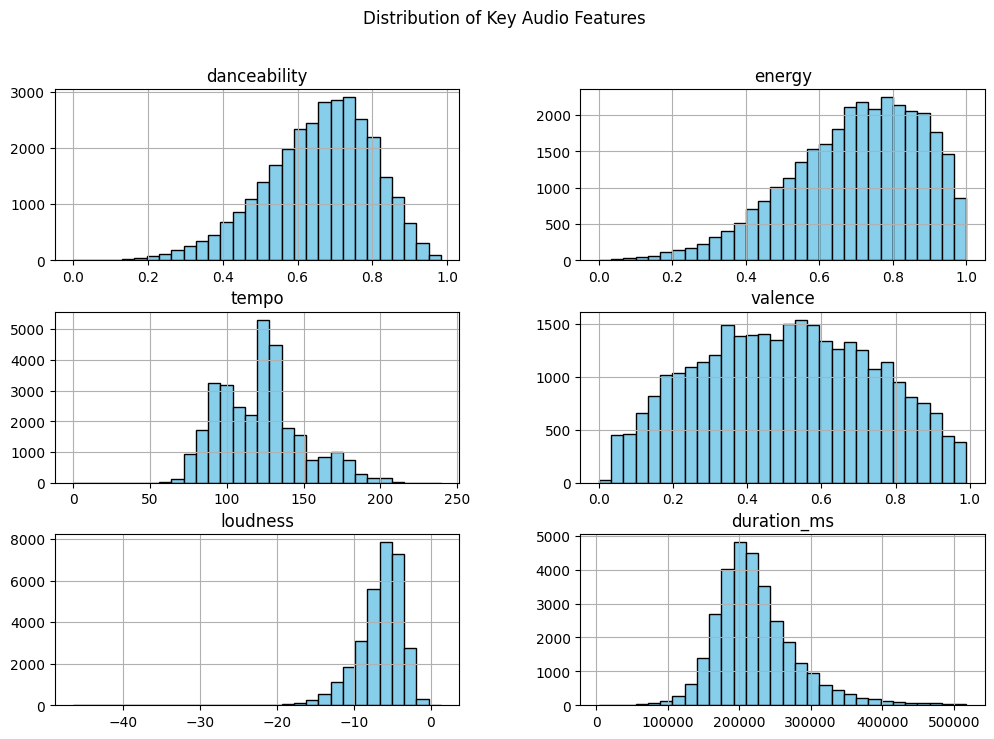

In [8]:
features = ['danceability', 'energy', 'tempo', 'valence', 'loudness', 'duration_ms']

df[features].hist(figsize=(12, 8), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Key Audio Features")
plt.show()

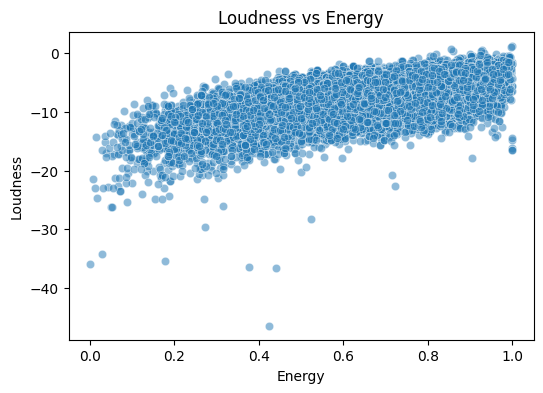

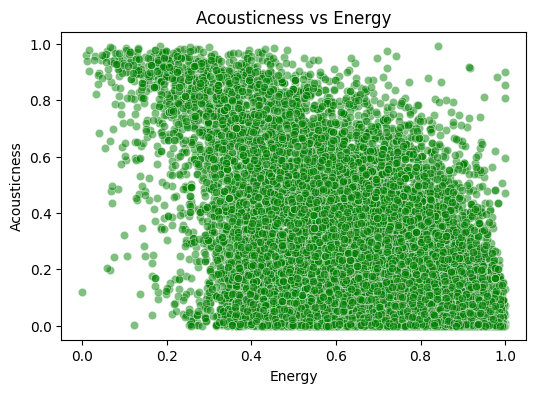

In [9]:
# Scatter plot: Loudness vs Energy
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['energy'], y=df['loudness'], alpha=0.5)
plt.title("Loudness vs Energy")
plt.xlabel("Energy")
plt.ylabel("Loudness")
plt.show()

# Scatter plot: Acousticness vs Energy
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['energy'], y=df['acousticness'], alpha=0.5, color='green')
plt.title("Acousticness vs Energy")
plt.xlabel("Energy")
plt.ylabel("Acousticness")
plt.show()


In [11]:
top_100_df = df.nlargest(10, 'track_popularity')

# Create the scatter plot
fig = px.scatter(top_100_df, x="danceability", y="valence",
                 color="track_popularity", size="track_popularity",
                 hover_data=['track_name', 'track_artist'])

fig.update_layout(title="Interactive Danceability vs Valence (Top 100 by Popularity)")
fig.show()


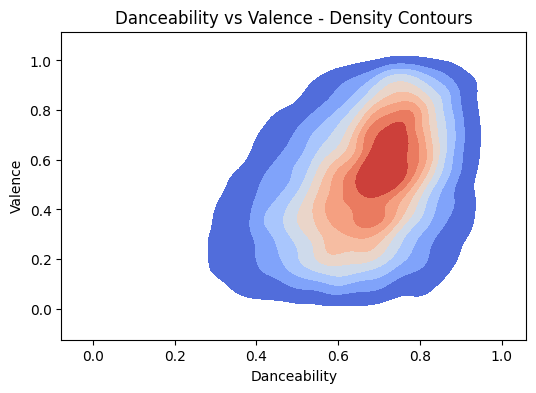

In [ ]:
# Scatter plot: Danceability vs Valence
plt.figure(figsize=(6, 4))
sns.kdeplot(x=df['danceability'], y=df['valence'], cmap='coolwarm', fill=True)
plt.title("Danceability vs Valence - Density Contours")
plt.xlabel("Danceability")
plt.ylabel("Valence")
plt.show()

plt.figure(figsize=(6, 4))
plt.hexbin(df['danceability'], df['valence'], gridsize=50, cmap='Blues', mincnt=1)
plt.title("Danceability vs Valence")
plt.xlabel("Danceability")
plt.ylabel("Valence")
plt.show()


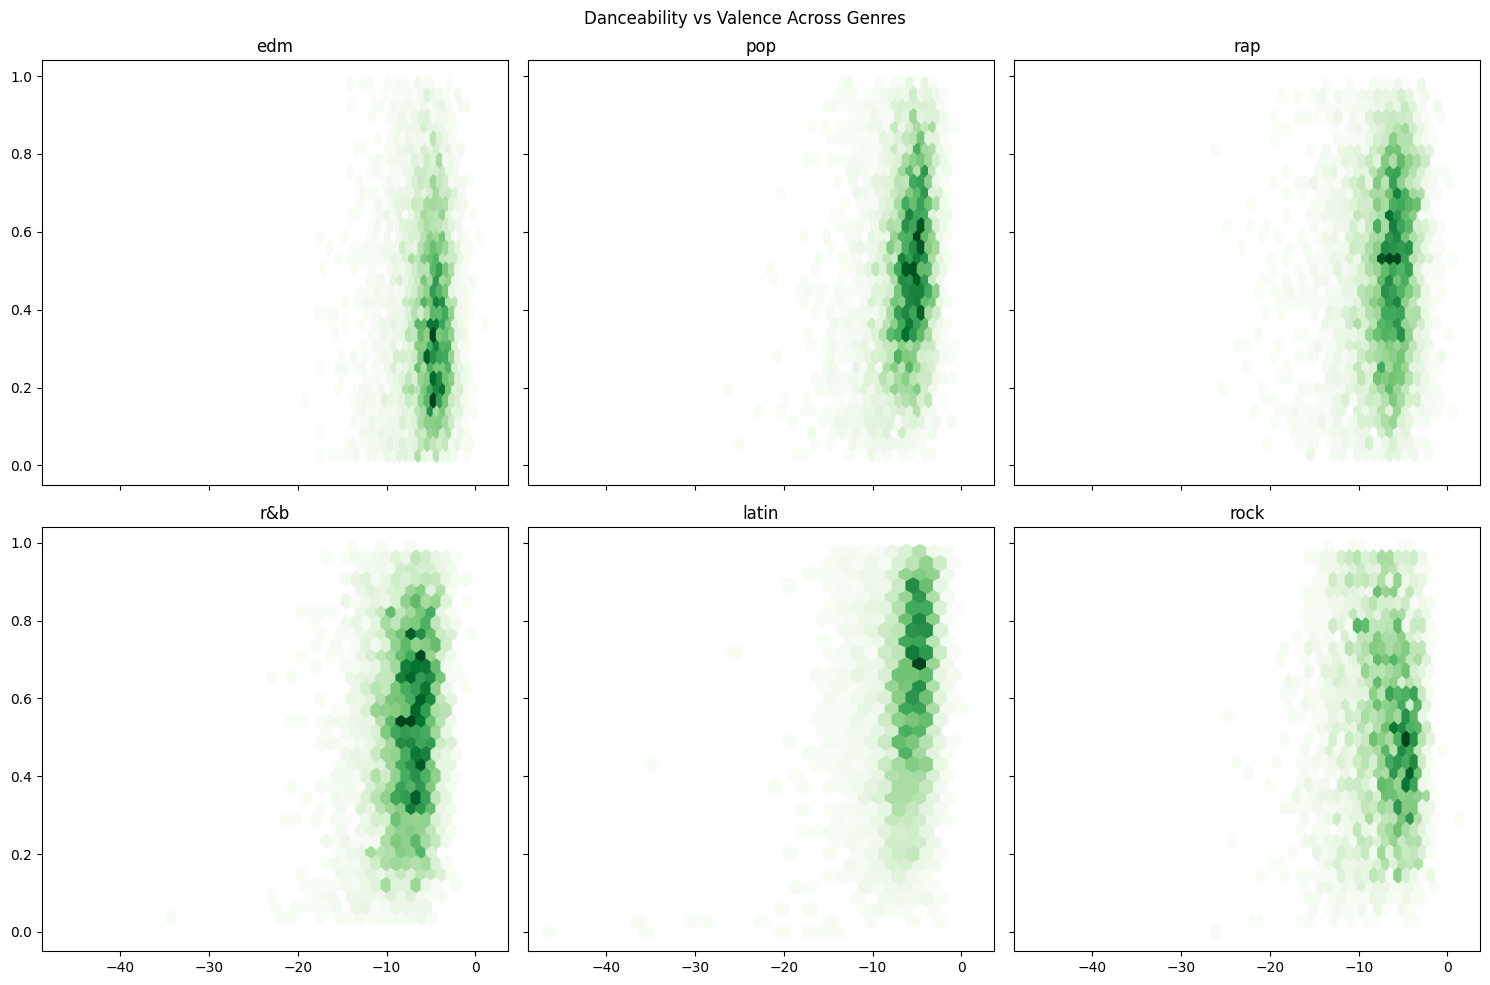

In [ ]:
genres = ['edm', 'pop', 'rap', 'r&b', 'latin', 'rock']
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)

for i, genre in enumerate(genres):
    row, col = divmod(i, 3)
    subset = df[df['playlist_genre'] == genre]
    axes[row, col].hexbin(subset['loudness'], subset['valence'], gridsize=30, cmap='Greens', mincnt=1)
    axes[row, col].set_title(genre)

plt.suptitle("Danceability vs Valence Across Genres")
plt.tight_layout()
plt.show()


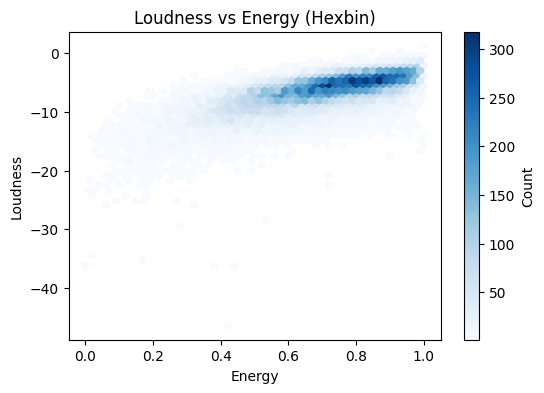

In [ ]:
plt.figure(figsize=(6, 4))
plt.hexbin(df['energy'], df['loudness'], gridsize=50, cmap='Blues', mincnt=1)
plt.colorbar(label="Count")
plt.title("Loudness vs Energy (Hexbin)")
plt.xlabel("Energy")
plt.ylabel("Loudness")
plt.show()


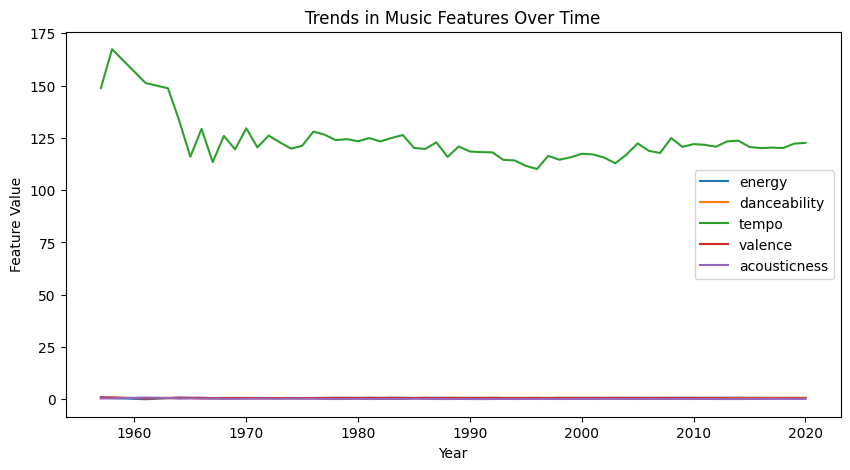

In [ ]:
# Group by release year and calculate mean values
df['release_year'] = df['track_album_release_date'].dt.year
yearly_trends = df.groupby('release_year')[['energy', 'danceability', 'tempo', 'valence', 'acousticness']].mean()

# Plot trends
plt.figure(figsize=(10, 5))
for feature in ['energy', 'danceability', 'tempo', 'valence', 'acousticness']:
    plt.plot(yearly_trends.index, yearly_trends[feature], label=feature)

plt.legend()
plt.title("Trends in Music Features Over Time")
plt.xlabel("Year")
plt.ylabel("Feature Value")
plt.show()
